In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
pd.plotting.register_matplotlib_converters()
import folium
from folium.plugins import HeatMap
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df =pd.read_csv("/content/housing_price_data.csv")
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [3]:
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
df.tail()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4
13931,25.784387,-80.258901,131320040700,250000.0,8833,1867,266,3793.9,20859.6,3421.0,21928.6,12599.0,474.7,62,0,11,4


In [5]:
df.shape

(13932, 17)

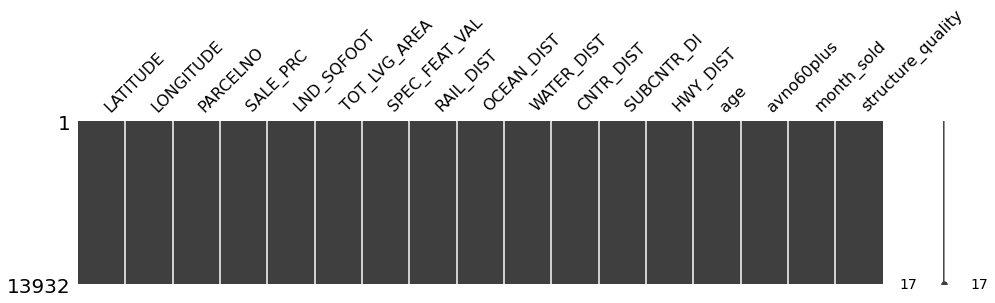

In [6]:
df_meta = df.columns
import missingno as msno
msno.matrix(
    df,
    figsize = (16, 3))

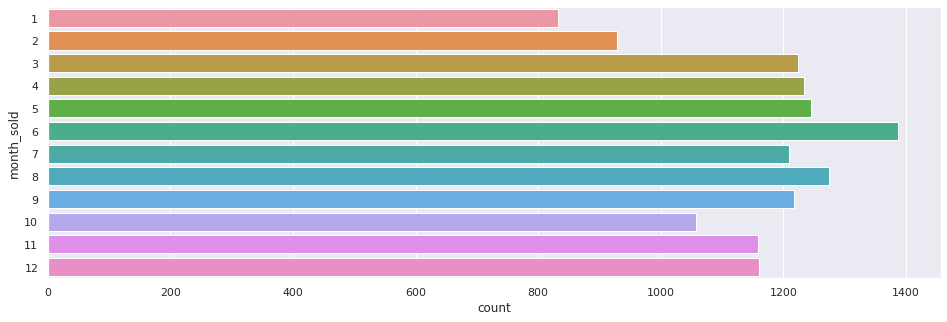

In [7]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,5))
ax = sns.countplot(y="month_sold", data=df)

In [8]:
df2 = df[['LATITUDE', 'LONGITUDE']].copy()
my_map=folium.Map(location = [42.320,-71.05], 
                  zoom_start = 11,
                  min_zoom = 11)
HeatMap(data=df2, radius=16).add_to(my_map)

my_map

In [9]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = df['month_sold'],
                     values = df['SALE_PRC'],
                     name = "month_sold",
                     hole = 0.75,
                     marker_colors = px.colors.cyclical.Edge
                    )
             )

fig.update_layout(
    title_text = "month_sold",
    annotations = [dict(text = 'month_sold',
                      x = 0.5,
                      y = 0.5,
                      font_size = 20,
                      showarrow = False
                     )])

fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 26.9 MB/s 
     |████████████████████████████████| 16.7 MB 41.6 MB/s 


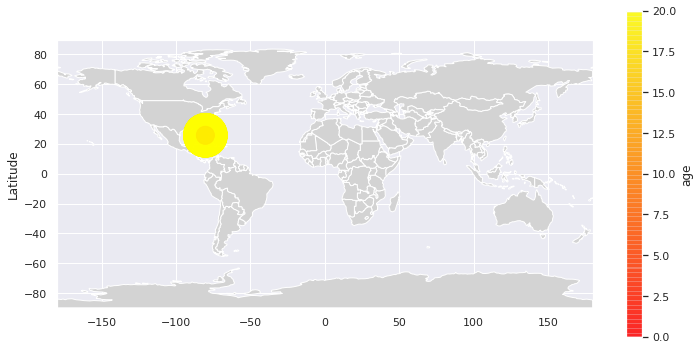

In [10]:
!pip install geopandas
import geopandas as gpd

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

x = df['LONGITUDE']
y = df['LATITUDE']
z = df['age']
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=20,cmap='autumn')
plt.colorbar(label='age')

plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.ylabel("Latitude")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



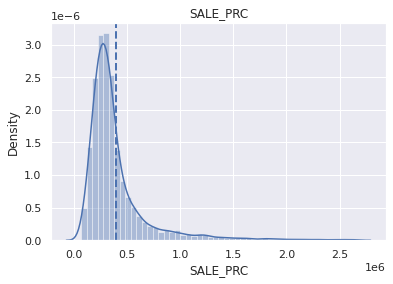

In [11]:
#checking the target variables for distribution
sns.distplot(df['SALE_PRC'])
plt.axvline(x=df['SALE_PRC'].mean(),  linestyle='--', linewidth=2)
plt.title('SALE_PRC');

skew: 3.2155058107172554
skew: 0.7387370794683509


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



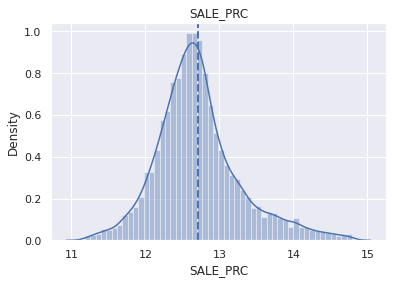

In [12]:
print('skew: {}'.format(df['SALE_PRC'].skew()))
df["SALE_PRC"] = np.log(df["SALE_PRC"])
print('skew: {}'.format(df['SALE_PRC'].skew()))
#checking the target variables for distribution
sns.distplot(df['SALE_PRC'])
plt.axvline(x=df['SALE_PRC'].mean(),  linestyle='--', linewidth=2)
plt.title('SALE_PRC');

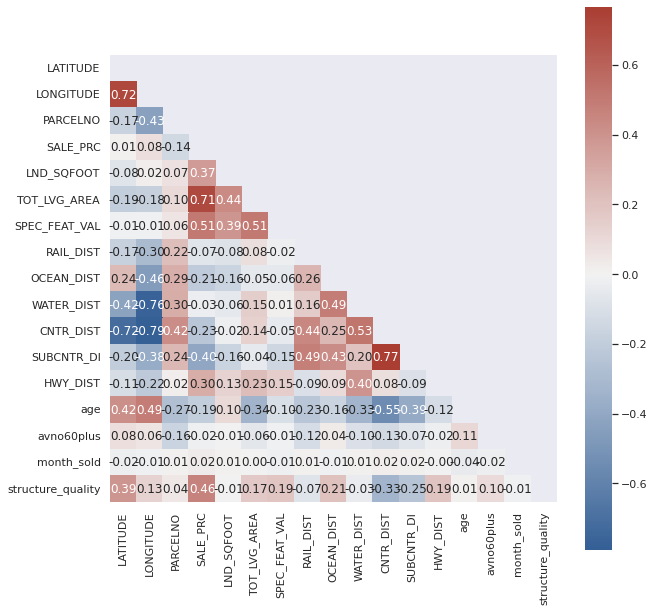

In [13]:
# Calculate pairwise-correlation
matrix = df.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show();

In [14]:
df = df.drop(columns=[ 'avno60plus','WATER_DIST'])
df.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'month_sold', 'structure_quality'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'SALE_PRC']
Y = df["SALE_PRC"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)
#print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))
y_train = np.array(y_train).reshape(-1, 1)
y_train = pd.DataFrame(y_train)
y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)

**LINEAR REGRESSION**

In [16]:
from sklearn.linear_model import LinearRegression
Lireg = LinearRegression()
Lireg.fit(X_train, y_train)
lr_pred = Lireg.predict(X_test)

([<matplotlib.lines.Line2D at 0x7feef6798690>],
 [<matplotlib.lines.Line2D at 0x7feef6798c90>])

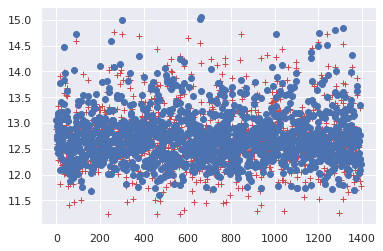

In [17]:
plt.plot(y_test,'r+'),plt.plot(lr_pred,'bo')

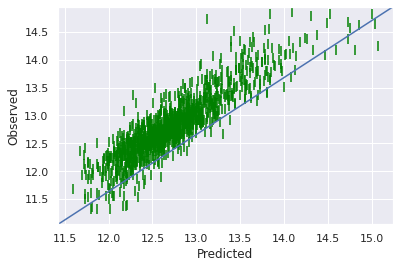

In [18]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(lr_pred, y_test, s=100, alpha=1,marker=2,facecolor='green')
plt.xlabel("Predicted")
plt.ylabel("Observed")

plt.show()

In [19]:
lr = r2_score(y_test, lr_pred)*100
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
print('Score: ',lr)
print('MAE: ',mae_lr)
print('MSE: ',mse_lr)

Score:  79.33345529678502
MAE:  0.18772315182447266
MSE:  0.06432063519663575


**SUPPORT VECTOR REGRESSION**

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values)

In [21]:
from sklearn.svm import SVR
SVRregressor = SVR(kernel='rbf')
SVRregressor.fit(X_train_scaled,y_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [22]:
X_test_scaled = sc_X.fit_transform(X_test)
y_test_scaled = sc_y.fit_transform(y_test.values.reshape(-1, 1))
y_pred_scaled=SVRregressor.predict(X_test_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(1, -1))

In [23]:
svr = r2_score(np.array(y_test), y_pred[0])*100
mae_lr = mean_absolute_error(np.array(y_test), y_pred[0])
mse_lr = mean_squared_error(np.array(y_test), y_pred[0])
print('Score: ',svr)
print('MAE: ',mae_lr)
print('MSE: ',mse_lr)

Score:  92.38952457889805
MAE:  0.10256387756429616
MSE:  0.023686137197260197


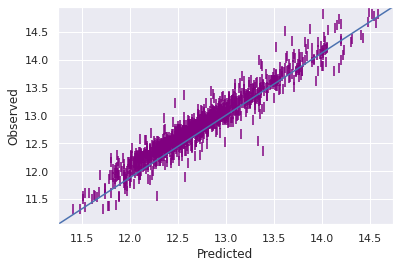

In [24]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred[0], np.array(y_test), s=100, alpha=1,marker=2,facecolor='purple')
plt.xlabel("Predicted")
plt.ylabel("Observed")

plt.show()

([<matplotlib.lines.Line2D at 0x7fee89d73d90>],
 [<matplotlib.lines.Line2D at 0x7fee89d7c3d0>])

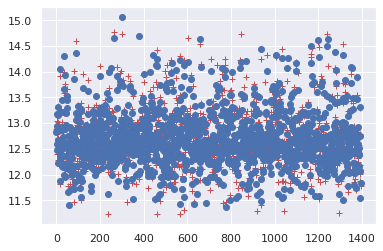

In [48]:
plt.plot(y_test,'r+'),plt.plot(y_pred[0],'bo')

**DECISION TREE REGRESSOR**

In [26]:
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor(random_state = 0)
DTreg.fit(X_train, y_train)

# Predicting a new result
y_pred=DTreg.predict(X_test)

In [27]:
dt = r2_score(y_test, y_pred)*100
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
print('Score: ',dt)
print('MAE: ',mae_lr)
print('MSE: ',mse_lr)

Score:  83.91953359405917
MAE:  0.1494328301233317
MSE:  0.05004735084367414


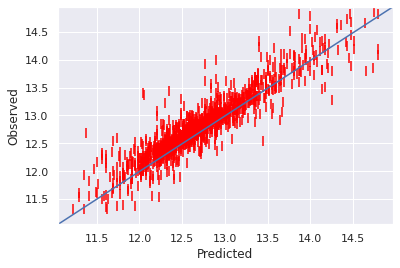

In [28]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred, np.array(y_test), s=100, alpha=1,marker=2,facecolor='red')
plt.xlabel("Predicted")
plt.ylabel("Observed")

plt.show()

([<matplotlib.lines.Line2D at 0x7feef5598490>],
 [<matplotlib.lines.Line2D at 0x7feef5598a50>])

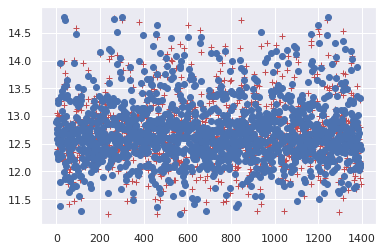

In [29]:
plt.plot(y_test,'r+'),plt.plot(y_pred,'bo')

**RANDOM FOREST REGRESSOR**

In [30]:
# Training the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [31]:
rf = r2_score(y_test, y_pred)*100
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
print('Score: ',rf)
print('MAE: ',mae_lr)
print('MSE: ',mse_lr)

Score:  93.09505681116795
MAE:  0.09868996749908981
MSE:  0.021490304174227544


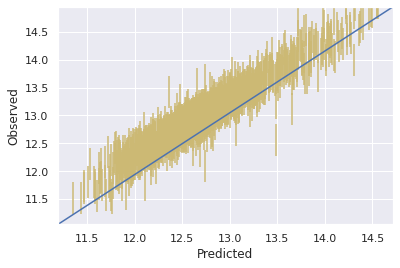

In [32]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred, y_test, s=1000, alpha=1,marker=2,facecolor='y')
plt.xlabel("Predicted")
plt.ylabel("Observed")

plt.show()

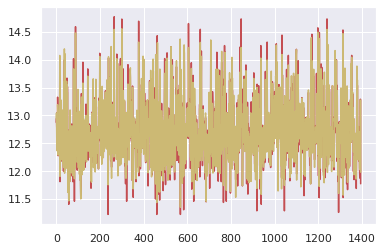

In [33]:
plt.plot(y_test,c='r')
plt.plot(y_pred,c='y')

**XGBOOST REGRESSOR**

In [49]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=500)

In [50]:
model.fit(X_train, y_train)

[05:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=500)

In [51]:
y_pred=model.predict(X_test)

In [52]:
xgb = r2_score(y_test, y_pred)*100
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
print('Score: ',xgb)
print('MAE: ',mae_lr)
print('MSE: ',mse_lr)

Score:  93.23564705549035
MAE:  0.10005045949714304
MSE:  0.021052744149214767


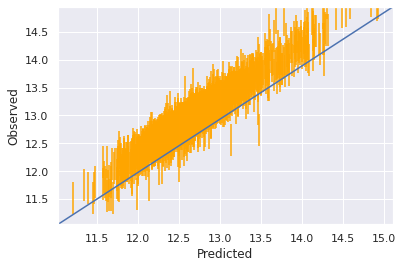

In [38]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred, y_test, s=1000, alpha=1,marker=2,facecolor='orange')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

([<matplotlib.lines.Line2D at 0x7feeec33d1d0>],
 [<matplotlib.lines.Line2D at 0x7feeec33d690>])

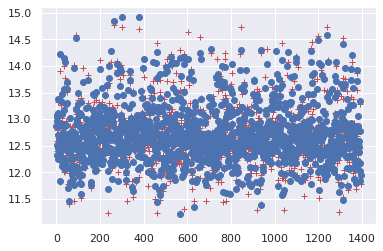

In [39]:
plt.plot(y_test,'r+'),plt.plot(y_pred,'bo')

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values)
X_test_scaled = sc_X.fit_transform(X_test)
y_test_scaled = sc_y.fit_transform(y_test.values.reshape(-1, 1))

**NEURAL NETWORK**

In [41]:
from keras.models import Sequential
from keras.layers import Dense
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=14, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train_scaled,epochs =100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
392/392 [==============================] - 1s 2ms/step - loss: 0.1488 - mae: 0.2683
Epoch 2/100
392/392 [==============================] - 1s 2ms/step - loss: 0.1053 - mae: 0.2271
Epoch 3/100
392/392 [==============================] - 1s 2ms/step - loss: 0.0926 - mae: 0.2128
Epoch 4/100
392/392 [=======

In [42]:
loss, acc = model.evaluate(X_test_scaled, y_test_scaled,batch_size=16)
y_pred_scaled = model.predict(X_test_scaled)

88/88 [==============================] - 0s 1ms/step - loss: 0.0691 - mae: 0.1799


In [43]:
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(1, -1))
nn = r2_score(np.array(y_test), y_pred[0])*100
mae_lr = mean_absolute_error(np.array(y_test), y_pred[0])
mse_lr = mean_squared_error(np.array(y_test), y_pred[0])
print('Score: ',nn)
print('MAE: ',mae_lr)
print('MSE: ',mse_lr)

Score:  93.08683709850042
MAE:  0.10037333139605044
MSE:  0.021515886444873258


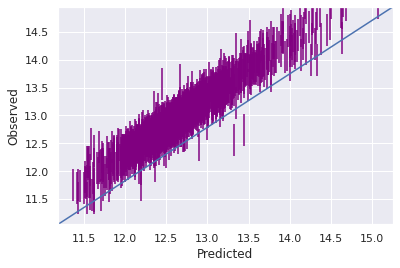

In [44]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred, y_test, s=1000, alpha=1,marker=2,facecolor='purple')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

([<matplotlib.lines.Line2D at 0x7fee89f60090>],
 [<matplotlib.lines.Line2D at 0x7fee89f1e450>])

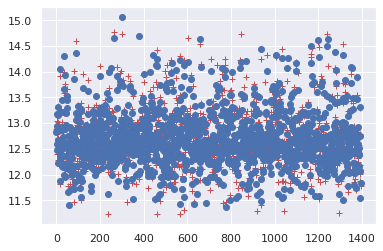

In [45]:
plt.plot(y_test,'r+'),plt.plot(y_pred[0],'bo')

,Model,Score
0,XGBoost,93.235647
1,Random Forest,93.095057
2,Neural Network,93.086837
3,SVR,92.389525
4,Decision trees,83.919534
5,Linear Regression,79.333455


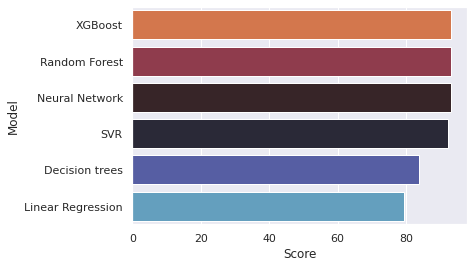

In [46]:
models = pd.DataFrame({
    'Model':['Decision trees', 'Linear Regression', 'Random Forest', 'SVR','XGBoost','Neural Network'],
    'Score' : [dt, lr, rf,svr, xgb,nn]
})
sns.barplot(x='Score', y='Model', palette='icefire_r',data=models.sort_values(by='Score',
                                                                         ascending=False, ignore_index=True))

models.sort_values(by='Score', ascending=False, ignore_index=True)

In [53]:
import pickle
# Lets dump our XGBOOST model
pickle.dump(model, open('modelXGB.pkl','wb'))